In [ ]:
!pip install pandas

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
X = pd.read_csv('Dataset/Classification/logisticX.csv')
Y = pd.read_csv('Dataset/Classification/logisticY.csv')
X = X.values # To covert dataframe into numpy array
Y = Y.values

In [84]:
X[:5,:]

array([[3.6898, 6.6051],
       [2.7763, 7.5057],
       [3.1137, 5.7724],
       [2.9251, 5.4315],
       [3.6699, 6.4406]])

In [85]:
u = X.mean(axis=0)
std = X.std(axis=0)

X = (X-u)/std

In [87]:
ones = np.ones((99,1))
X = np.hstack((ones,X))
print(X[:5,:])
print(X.shape)

[[ 1.         -0.70739532  1.49166385]
 [ 1.         -1.39759229  2.13781242]
 [ 1.         -1.14266896  0.89423113]
 [ 1.         -1.28516611  0.64964747]
 [ 1.         -0.72243081  1.37364094]]
(99, 3)


In [88]:
Y.shape

(99, 1)

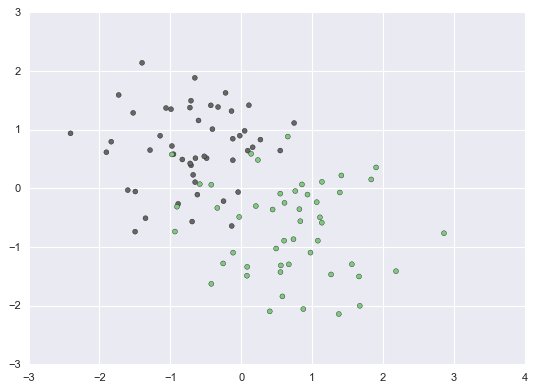

In [89]:
plt.style.use("seaborn")
plt.scatter(X[:,1],X[:,2],c=Y[:,0],cmap=plt.cm.Accent_r)
plt.show()

In [91]:
def sigmoid(z):
    return 1/(1.0 + np.exp(-z))

def getYPred(theta,X):
    return sigmoid(np.dot(X,theta))

def error(X,Y,theta):
    Y_ = getYPred(theta,X)
    e = 0
    m = X.shape[0]
    e += Y*np.log(Y_) + (1-Y)*np.log(1-Y_)
    return -e/X.shape[0]

def getGrad(X,Y,theta):
    Y_ = getYPred(theta,X)
    grad = np.dot(X.T,(Y_-Y))
    return grad

In [92]:
def gradDescent(X,Y,lr,itr=100):
    theta = np.zeros((X.shape[1],1))
    error_list = []
    for i in range(itr):
        grad = getGrad(X,Y,theta)
        theta = theta - lr*grad
        e = error(X,Y,theta)
        error_list.append(e[0])
        
    return theta,error_list
    
    

In [99]:
theta,error_list = gradDescent(X,Y,0.01)

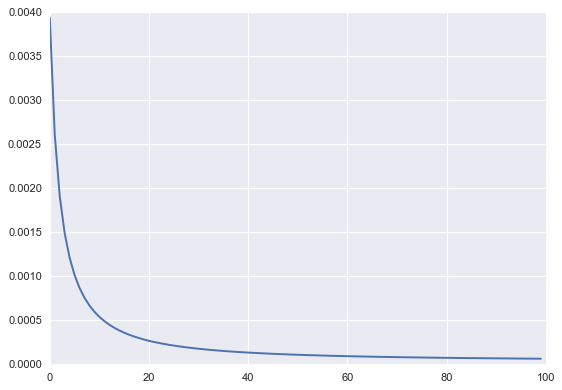

In [100]:
plt.plot(error_list)
plt.show()

In [101]:
print(theta)

[[ 0.38335002]
 [ 2.35797663]
 [-2.54326727]]


In [ ]:
def drawPlane():
    #plt.style.use("seaborn")
    plt.scatter(X[:,1],X[:,2],c=Y[:,0],cmap=plt.cm.Accent_r)
    
    x_1 = np.linspace(-4,4,10)
    x_2 = -(theta[1]*x_theta[])
    plt.show()